Before we start: please fill out our weekly attendance form! https://forms.gle/njrwXR9r416yzXnn7

Fall quarter outline:

* Week 3: Introduction
* Week 4: Data retrieval and preparation
* **Week 5: Exploratory data analysis (EDA)**
    * Data exploration: aggregation, split-apply-combine
    * Data visualization: matplotlib, seaborn
* Week 6: Modeling and machine learning, part 1
* Week 7: Modeling and machine learning, part 2
* *Week 8: Thanksgiving*
* Week 9: Neural networks 

A reminder of where we are in the data science process:

<img src="https://miro.medium.com/max/1200/1*eE8DP4biqtaIK3aIy1S2zA.png" width="800">

### Mounting Google Drive

Don't worry about this; this bit of code is only necessary because we're working in Google Colab instead of Jupyter Notebook. I'm mounting Google Drive to this notebook so that I can access files that are stored there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive/My Drive/DSU 2020-2021/Curriculum/Datasets"

/content/drive/My Drive/DSU 2020-2021/Curriculum/Datasets


In [ ]:
!ls

 Admission_Predict.csv	'Islander scraping.ipynb'
 datafest_api_key.txt	 myfig.jpg
 Iris.csv		'Stack Overflow Dev Survey 2020'


# What is exploratory data analysis (EDA)?

Last week, we covered how to retrieve data and how to prepare/clean it. 

The next step of the data science process is **exploratory data analysis (EDA)**, in which we try to learn more about our data before we attempt to build a model on it. During EDA, our goals include:

* Identifying interesting trends within the data
* Testing hypotheses and model assumptions
* Deciding which variables or models to use

There's no exact process for EDA, but a general tip: be curious! Once you're working on your own projects, you should be asking (and answering) as many good questions as you can come up with before moving on.

We'll split up EDA into two parts: data exploration and data visualization. They usually go hand in hand, but for the sake of this presentation, we'll cover them one at a time. 

**Data exploration** encompasses all the *non-graphical* methods of EDA, while **data visualization** encompasses all the *graphical* methods of EDA. We'll dive into them in more detail below.

The dataset we'll be using this week should be familiar to you all: `"Admission_Predict.csv"` from [Graduate Admissions](https://www.kaggle.com/mohansacharya/graduate-admissions) on Kaggle.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


Something that's a little annoying is that some of the column names have a space at the end for no apparent reason. 

Let's quickly fix that before moving on:

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.rename({'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'}, axis=1, inplace=True)

df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

# Data exploration

The main methods of data exploration are *aggregation* and *group operations* (a.k.a. *split-apply-combine*).

## Aggregation

**Aggregation** refers to any operation that converts an *array* (a list of values) to a *scalar* (a single value). Some examples are the length, mean, min, and max of a column.

`.describe()` is a useful method which returns a lot of useful summary statistics about the `DataFrame` you call it on:

In [ ]:
 df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


More generally, you can call the `.agg()` method to use different summary statistics of your choice. For example:

In [ ]:
df.agg(['mean', 'median', 'std'])

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
median,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609


From this, we can glean some useful information, like the average GRE score, proportion of students with research experience, etc. We can also guess from comparing the means and medians that none of the variables seem to be particularly skewed, but we can show that better when we plot their distributions later.

Something else you might want to do is to tabulate the number of observations in each category for a categorical variable. For that, you can use `.value_counts()`:

In [ ]:
df['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

This is all pretty simple, but what happens when we try to aggregate over a subset of the `DataFrame` instead of the entire thing?

## Group Operations

**Group operations** are a more general type of aggregation: they allow us to apply various aggregation methods to different *groups* within a dataset. 

Another name for group operations, **split-apply-combine**, describes the process well:

1. *Split* the data into several groups, based off some criteria
2. *Apply* an aggregation method to each of those groups
3. *Combine* the resulting summary statistics into a new `DataFrame`

To do this, we can use the `.groupby()` method, which creates a `pd.GroupBy` object. For example, grouping by University Rating:

In [ ]:
grouped = df.groupby('University Rating')
grouped

The `GroupBy` object has several useful attributes and methods. The `groups` attribute is a dictionary which contains the group names as well as their row indexes:

In [ ]:
grouped.groups

{1: [8, 28, 37, 38, 58, 79, 139, 159, 160, 161, 239, 240, 272, 273, 274, 293, 317, 345, 347, 348, 367, 368, 369, 377, 378, 379], 2: [4, 7, 27, 29, 30, 36, 39, 41, 42, 51, 57, 59, 60, 62, 63, 67, 75, 77, 78, 87, 90, 92, 93, 96, 101, 102, 103, 113, 118, 137, 138, 140, 141, 144, 145, 149, 157, 158, 168, 169, 170, 181, 182, 184, 195, 196, 197, 201, 205, 206, 208, 223, 224, 225, 226, 227, 232, 233, 241, 244, 247, 251, 252, 262, 264, 266, 270, 271, 277, 278, 279, 290, 291, 292, 294, 295, 300, 301, 302, 304, 314, 315, 316, 322, 323, 327, 329, 331, 343, 344, 346, 352, 354, 355, 357, 358, 359, 363, 370, 374, ...], 3: [2, 3, 6, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 31, 40, 48, 50, 54, 55, 56, 61, 64, 66, 68, 74, 76, 80, 86, 88, 91, 94, 97, 99, 100, 104, 105, 112, 114, 116, 123, 125, 126, 127, 128, 136, 146, 147, 153, 154, 155, 156, 162, 163, 166, 167, 177, 178, 179, 180, 183, 186, 194, 198, 199, 200, 204, 207, 209, 219, 220, 221, 228, 230, 231, 238, 242, 243, 246, 248, 249, 250, 256, 257, 261, 

To directly access a group by name, we can use `.get_group()`:

In [ ]:
grouped.get_group(1)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
8,9,302,102,1,2.0,1.5,8.00,0,0.50
28,29,295,93,1,2.0,2.0,7.20,0,0.46
37,38,300,105,1,1.0,2.0,7.80,0,0.58
38,39,304,105,1,3.0,1.5,7.50,0,0.52
58,59,300,99,1,3.0,2.0,6.80,1,0.36
79,80,294,93,1,1.5,2.0,7.36,0,0.46
139,140,318,109,1,3.5,3.5,9.12,0,0.78
159,160,297,100,1,1.5,2.0,7.90,0,0.52
160,161,315,103,1,1.5,2.0,7.86,0,0.57
161,162,298,99,1,1.5,3.0,7.46,0,0.53


From the `GroupBy` object we can also call several typical aggregation methods, such as `.sum()`, `.mean()`, `.median()`. For example:

In [ ]:
grouped.mean()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,,
1,233.807692,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,214.813084,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,204.165414,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,199.594595,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,153.533333,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


You can also use the `.agg()` or `.apply()` method to aggregate using a function of your choice (this can be especially useful when that function *isn't* a typical one): 

In [ ]:
grouped.apply(np.mean)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,,,
1,233.807692,303.153846,99.076923,1.0,1.884615,2.211538,7.745769,0.192308,0.548077
2,214.813084,309.177570,103.523364,2.0,2.705607,2.925234,8.183738,0.299065,0.625981
3,204.165414,315.954887,106.887218,3.0,3.364662,3.402256,8.552256,0.533835,0.711880
4,199.594595,324.824324,111.824324,4.0,4.108108,4.006757,9.021622,0.797297,0.818108
5,153.533333,328.333333,113.666667,5.0,4.500000,4.358333,9.291167,0.866667,0.888167


Note that the groups became the index of the resulting `DataFrame`. If you want to avoid this, you can combine the aggregation method with `.reset_index()`:

In [ ]:
grouped.mean().reset_index()

,University Rating,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
0,1,233.807692,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
1,2,214.813084,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
2,3,204.165414,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
3,4,199.594595,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
4,5,153.533333,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


Great! Now to show how this works in practice, let's put it all together and try answering...

### Our application questions!

Remember our application questions? Let's try solving them using `pandas`! As a reminder, the first question was 

**1. What is the average GRE score among applicants with an admission chance above 80%?**

In [ ]:
df.groupby(df["Chance of Admit"] > 0.8).mean()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Chance of Admit,,,,,,,,,
False,202.812721,311.876325,104.777385,2.607774,3.024735,3.143110,8.318728,0.388693,0.656007
True,194.905983,328.735043,113.777778,4.247863,4.307692,4.200855,9.276667,0.931624,0.889658


We can see that the correct answer was 328.735 (or 328.328, if you used `>= 0.8` instead). 

If we want to access this value directly, we could use `.loc` on the result:

In [ ]:
ans = df.groupby(df["Chance of Admit"] > 0.8).mean().loc[True, "GRE Score"]
round(ans, 3)

328.735

Note: there are several other ways to solve questions like this without using `.groupby()`.

One approach is to use *masking*:

In [ ]:
df1 = df[df["Chance of Admit"] > 0.8]
df1["GRE Score"].mean()

328.7350427350427

Or the `.where()` method:

In [ ]:
df1 = df.where(df["Chance of Admit"] > 0.8)
df1["GRE Score"].mean()

328.7350427350427

**2. On average, is chance of admission different for those who have research experience versus those who don't?**

In [ ]:
df.groupby("Research").mean()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
Research,,,,,,,,
0,208.519337,309.491713,104.143646,2.524862,2.908840,3.060773,8.257182,0.637680
1,193.872146,322.853881,110.109589,3.552511,3.805936,3.776256,8.881370,0.795982


# Data visualization



"Information becomes much easier to grasp when shown in a picture, therefore you mainly use graphical techniques to gain an understanding of your data and the interactions between variables." - *Introducing Data Science*

And I'd also like to add that pretty visuals are what can make your project stand out to a non-technical audience, or to people who don't have the time to read through the whole report, so make them count!

For data visualization, we'll mainly be using the 2D plotting library `matplotlib`. To import it, we run:

In [ ]:
import matplotlib.pyplot as plt

We'll be going over how to make a few basic plots, but the plots you make for each project will largely be up to you.

## Matplotlib basics

### Anatomy of a Figure

When working with `matplotlib`, the objects you'll mainly be interacting with are `Figure` and `Axes`.

A **`Figure`** is the entire canvas that you'll be working with: basically, the whole figure, including the plot itself, its titles, and the surrounding areas. 

Each `Figure` includes **`Axes`**, which are the parts of the figure which actually contain the plots. You'll most often only be using one `Axes` object per `Figure`, but you can also have multiple `Axes` (for example, a 2x2 grid).

<img src="https://matplotlib.org/3.3.2/_images/anatomy.png" width="650">

### Plotting styles

According to the [matplotlib user guide](https://matplotlib.org/3.3.2/tutorials/introductory/usage.html), there are two main ways in which you can make plots in `matplotlib`: 
* *Object-oriented style*: explicitly create figures and axes, and call methods on them
* *pyplot style*: rely on pyplot to automatically create and manage the figures and axes, and use pyplot/`plt` functions for plotting

When you're only plotting on one set of `Axes`, it can be easiest to just use `plt` style. 

For example, to make a scatterplot using the Graduate Admissions dataset with `CGPA` on the x-axis against `Chance of Admit` on the y-axis, we can use `plt.scatter()`:

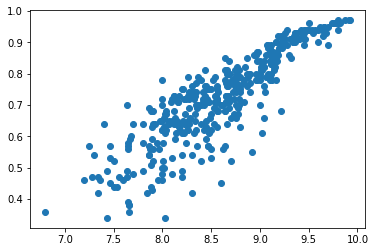

In [ ]:
plt.scatter(df['CGPA'], df['Chance of Admit'])
plt.show()

To make a line plot instead of a scatterplot, you use `plt.plot()` instead of `plt.scatter()`. Here's a simple example:

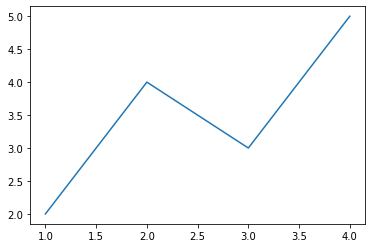

In [ ]:
plt.plot([1, 2, 3, 4], [2, 4, 3, 5])
plt.show()

These plots aren't very informative as they are right now, since they're completely unlabeled. Let's fix that by adding a title and axis labels:

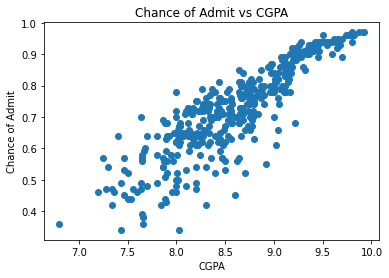

In [ ]:
plt.scatter(df['CGPA'], df['Chance of Admit'])
plt.title('Chance of Admit vs CGPA')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.show()

What if we want to change the size, color, or type of our markers? To do that, we can feed some optional arguments into `plt.scatter()`:

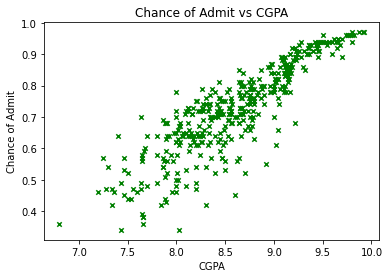

In [ ]:
plt.scatter(df['CGPA'], df['Chance of Admit'], s=20, c='green', marker='x')
plt.title('Chance of Admit vs CGPA')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.show()

To add grid lines, use `plt.grid(True)`:

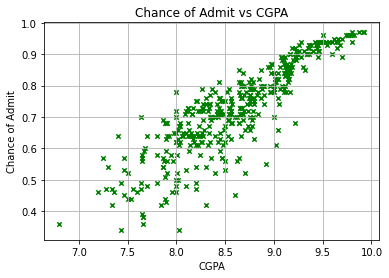

In [ ]:
plt.scatter(df['CGPA'], df['Chance of Admit'], s=20, c='green', marker='x')
plt.title('Chance of Admit vs CGPA')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.grid(True)
plt.show()

What if we want to plot multiple sets of points? To do that, you can just call `plt.scatter()` or `plt.plot()` twice.

For example, to plot those with `Research == 0` and `Research == 1` separately:

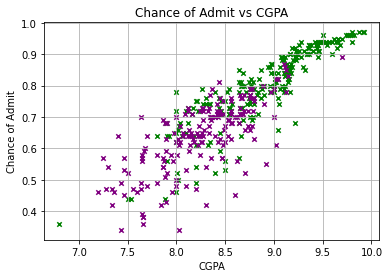

In [ ]:
df0 = df[df['Research'] == 0]
df1 = df[df['Research'] == 1]

plt.scatter(df1['CGPA'], df1['Chance of Admit'], s=20, c='green', marker='x')
plt.scatter(df0['CGPA'], df0['Chance of Admit'], s=20, c='purple', marker='x')
plt.title('Chance of Admit vs CGPA')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.grid(True)
plt.show()

But unless we're looking at the code, there's no way to tell what the green and purple points represent.

The easiest way to add a legend is to add a `label` argument to each plotting function that we call, and then call `plt.legend()` at the end:

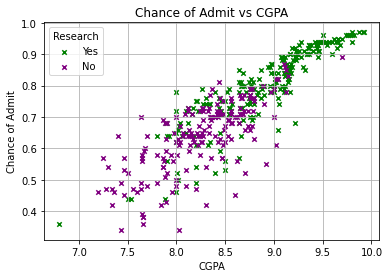

In [ ]:
df0 = df[df['Research'] == 0]
df1 = df[df['Research'] == 1]

plt.scatter(df1['CGPA'], df1['Chance of Admit'], s=20, c='green', marker='x', label='Yes')
plt.scatter(df0['CGPA'], df0['Chance of Admit'], s=20, c='purple', marker='x', label='No')
plt.title('Chance of Admit vs CGPA')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.legend(title='Research')
plt.grid(True)
plt.show()

To make the figure larger and save it, we can use specify the `figsize` in `plt.figure()`, and then call `plt.savefig()` at the end:

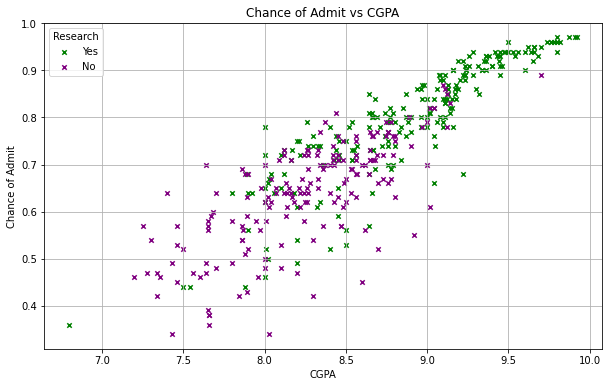

In [ ]:
df0 = df[df['Research'] == 0]
df1 = df[df['Research'] == 1]

plt.figure(figsize=(10,6))
plt.scatter(df1['CGPA'], df1['Chance of Admit'], s=20, c='green', marker='x', label='Yes')
plt.scatter(df0['CGPA'], df0['Chance of Admit'], s=20, c='purple', marker='x', label='No')
plt.title('Chance of Admit vs CGPA')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.legend(title='Research')
plt.grid(True)

plt.savefig("myfig.jpg")
plt.show()

To create the same plot in object-oriented style, you should use the function `fig, ax = plt.subplots()` to assign your `Figure` and `Axes` objects to `fig` and `ax` respectively, using tuple assignment.

Everything else is very similar, except you use *methods* of these two objects instead of using functions from the `plt` module.

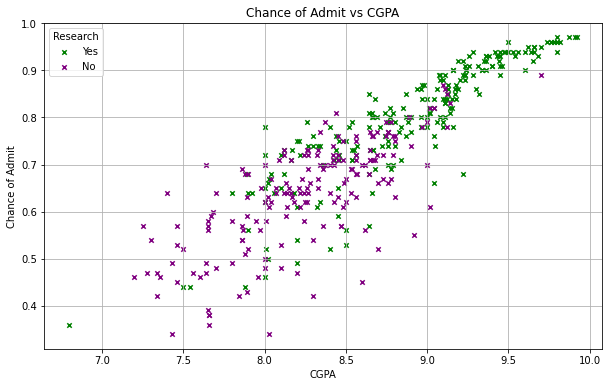

In [ ]:
df0 = df[df['Research'] == 0]
df1 = df[df['Research'] == 1]

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df1['CGPA'], df1['Chance of Admit'], s=20, c='green', marker='x', label='Yes')
ax.scatter(df0['CGPA'], df0['Chance of Admit'], s=20, c='purple', marker='x', label='No')
ax.set_title('Chance of Admit vs CGPA')
ax.set_xlabel('CGPA')
ax.set_ylabel('Chance of Admit')
ax.legend(title='Research')
ax.grid(True)

fig.savefig("myfig.jpg")
fig.show()

Creating plots in object-oriented style is particularly useful for when you want to include multiple subplots in the same figure. To do that, you can specify the number of rows and columns you want in `plt.subplots()`, and it will return an array of `Axes` objects instead of just one.

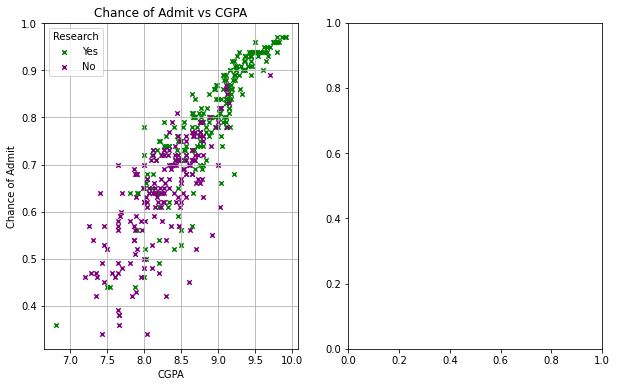

In [ ]:
df0 = df[df['Research'] == 0]
df1 = df[df['Research'] == 1]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

ax1.scatter(df1['CGPA'], df1['Chance of Admit'], s=20, c='green', marker='x', label='Yes')
ax1.scatter(df0['CGPA'], df0['Chance of Admit'], s=20, c='purple', marker='x', label='No')
ax1.set_title('Chance of Admit vs CGPA')
ax1.set_xlabel('CGPA')
ax1.set_ylabel('Chance of Admit')
ax1.legend(title='Research')
ax1.grid(True)

# fig.savefig("myfig.jpg")
fig.show()

By calling all those methods on `ax1`, we can see that we only affected the `Axes` on the left hand side of the figure, leaving a set of blank `Axes` on the right. If we want to graph something else there, we can call methods on `ax2`. For example:

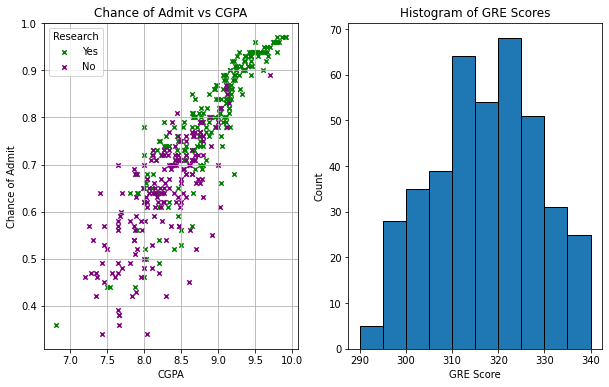

In [ ]:
df0 = df[df['Research'] == 0]
df1 = df[df['Research'] == 1]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

ax1.scatter(df1['CGPA'], df1['Chance of Admit'], s=20, c='green', marker='x', label='Yes')
ax1.scatter(df0['CGPA'], df0['Chance of Admit'], s=20, c='purple', marker='x', label='No')
ax1.set_title('Chance of Admit vs CGPA')
ax1.set_xlabel('CGPA')
ax1.set_ylabel('Chance of Admit')
ax1.legend(title='Research')
ax1.grid(True)

ax2.hist(df['GRE Score'], edgecolor='black')
ax2.set_title('Histogram of GRE Scores')
ax2.set_xlabel('GRE Score')
ax2.set_ylabel('Count')

# fig.savefig("myfig.jpg")
fig.show()

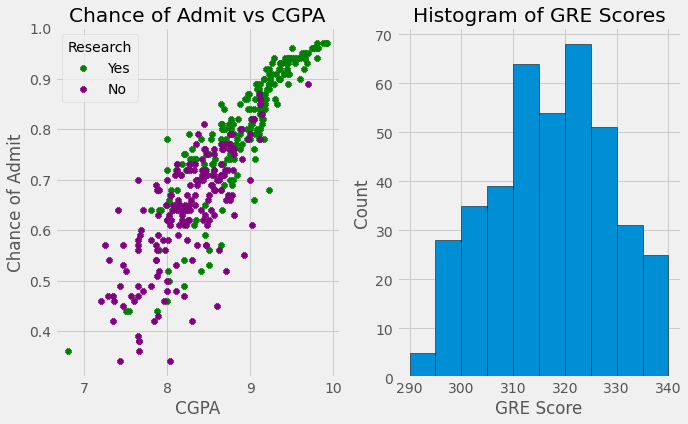

In [ ]:
plt.style.use('fivethirtyeight')

df0 = df[df['Research'] == 0]
df1 = df[df['Research'] == 1]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

ax1.scatter(df1['CGPA'], df1['Chance of Admit'], s=20, c='green', marker='x', label='Yes')
ax1.scatter(df0['CGPA'], df0['Chance of Admit'], s=20, c='purple', marker='x', label='No')
ax1.set_title('Chance of Admit vs CGPA')
ax1.set_xlabel('CGPA')
ax1.set_ylabel('Chance of Admit')
ax1.legend(title='Research')
ax1.grid(True)

ax2.hist(df['GRE Score'], edgecolor='black')
ax2.set_title('Histogram of GRE Scores')
ax2.set_xlabel('GRE Score')
ax2.set_ylabel('Count')

# fig.savefig("myfig.jpg")
fig.show()

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Seaborn

I also want to briefly introduce another plotting package called `seaborn`, which adds some useful functions on top of what we already have in `matplotlib`.

In [ ]:
import seaborn as sns

For example, here's a pairs plot of our Graduate Admissions data using `sns.pairplot()`:

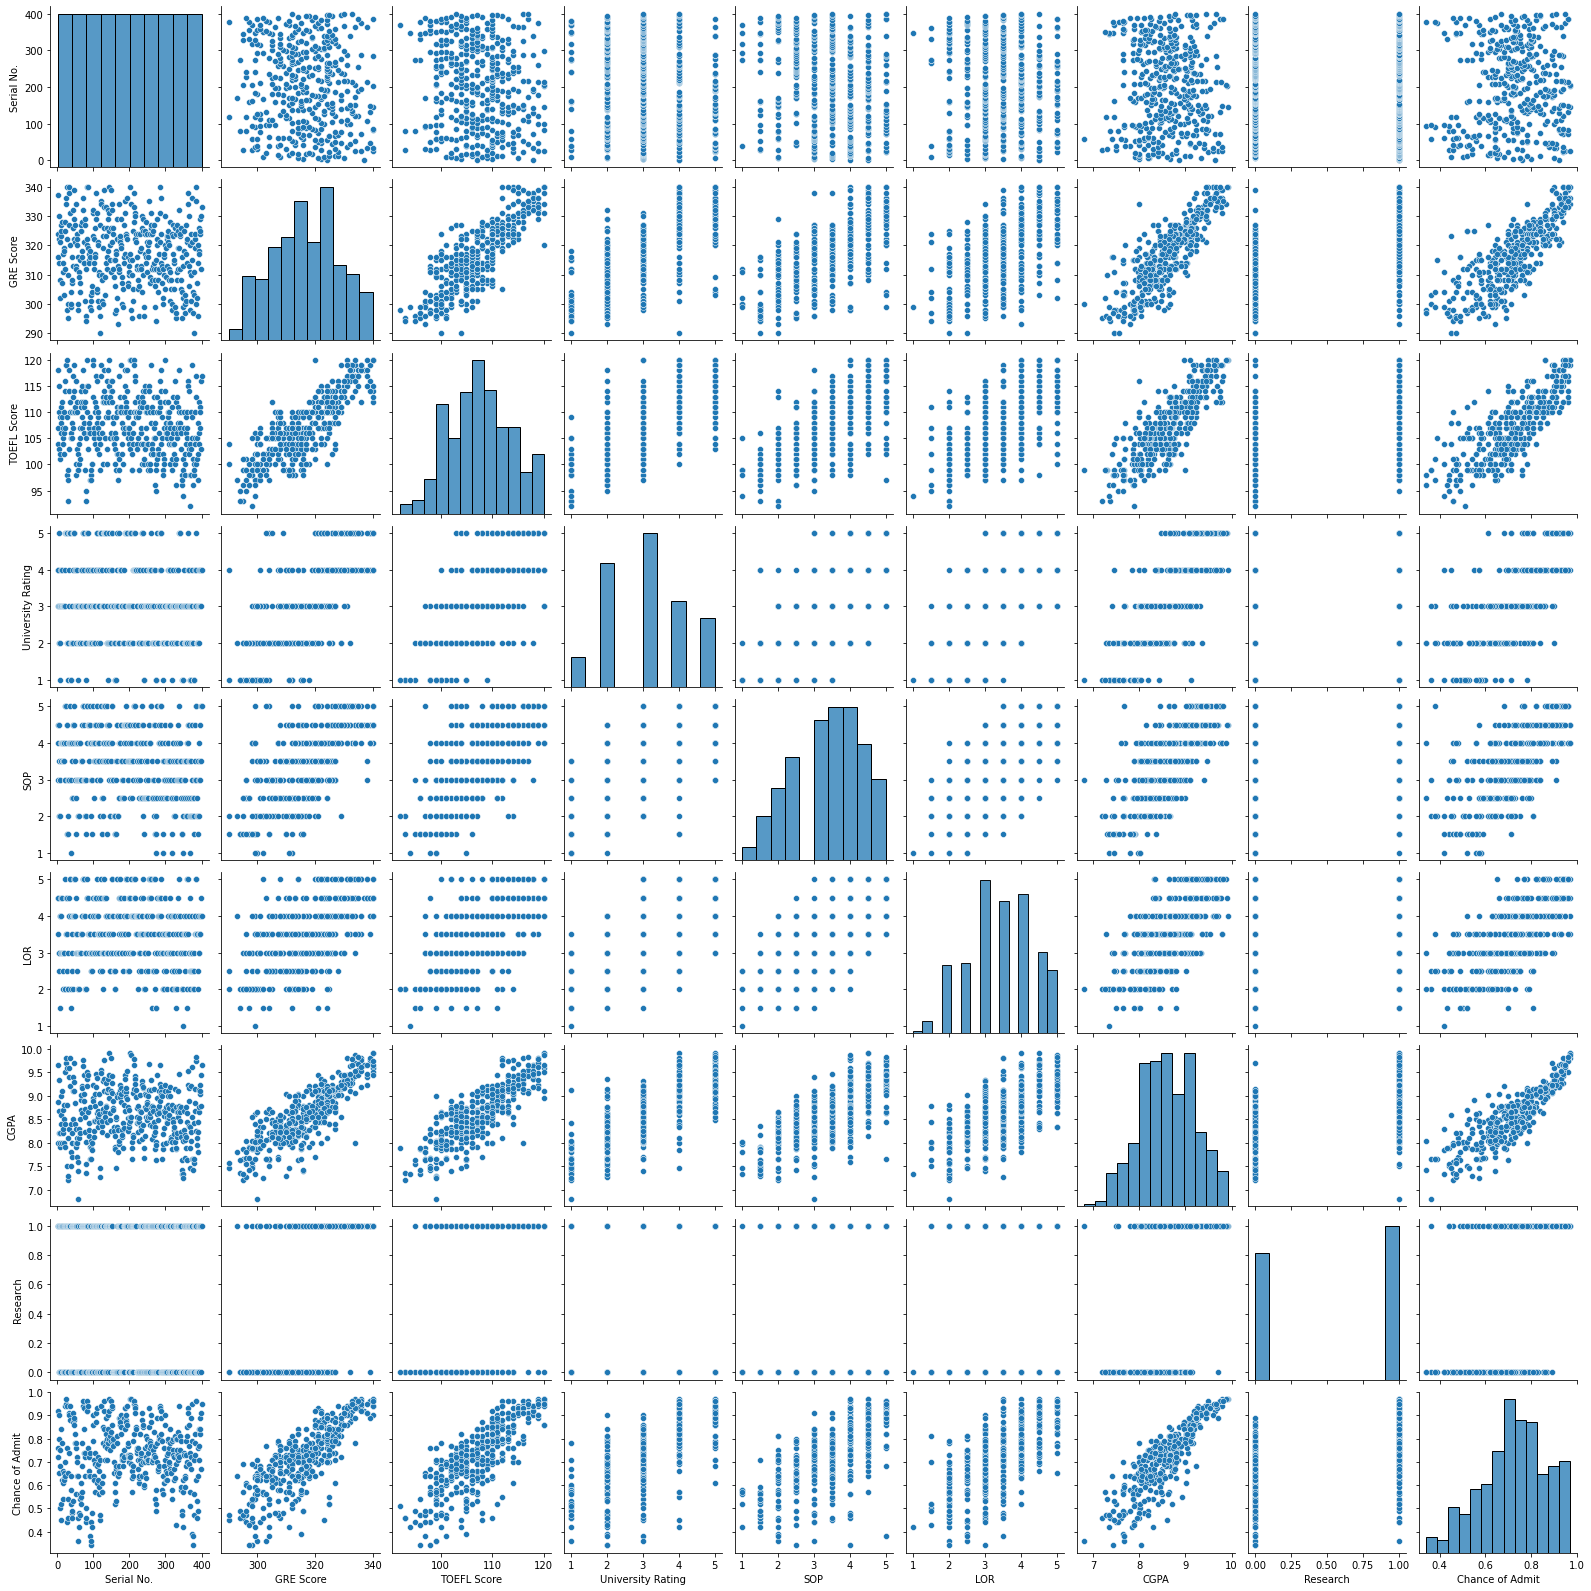

In [ ]:
sns.pairplot(df)
plt.show()

And here's how you can plot a correlation matrix using `seaborn`:

In [ ]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


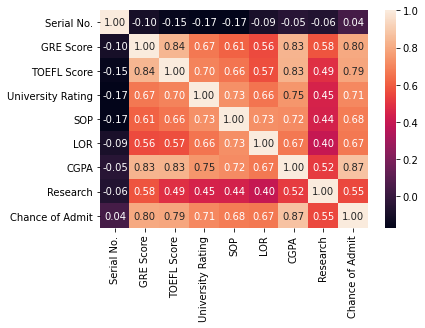

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# Free time at the end

In [ ]:
grouped = df.groupby(["University Rating", "Research"]).mean().reset_index()
grouped

,University Rating,Research,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
0,1,0,223.904762,302.190476,99.190476,1.761905,2.142857,7.711429,0.540476
1,1,1,275.400000,307.200000,98.600000,2.400000,2.500000,7.890000,0.580000
2,2,0,237.626667,307.573333,102.880000,2.620000,2.860000,8.120933,0.609867
3,2,1,161.343750,312.937500,105.031250,2.906250,3.078125,8.330937,0.663750
4,3,0,190.403226,312.290323,105.580645,3.322581,3.362903,8.457581,0.676290
5,3,1,216.183099,319.154930,108.028169,3.401408,3.436620,8.634930,0.742958
6,4,0,170.133333,314.333333,108.933333,3.533333,3.666667,8.572667,0.694000
7,4,1,207.084746,327.491525,112.559322,4.254237,4.093220,9.135763,0.849661
8,5,0,107.625000,315.875000,108.875000,4.250000,3.875000,8.822500,0.748750
9,5,1,160.596154,330.250000,114.403846,4.538462,4.432692,9.363269,0.909615


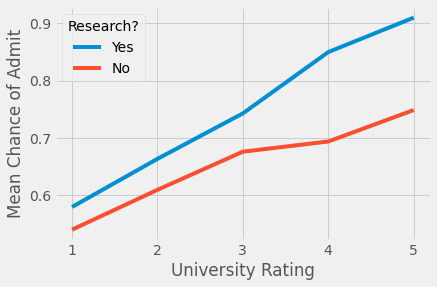

In [ ]:
df0 = grouped[grouped["Research"] == 0]
df1 = grouped[grouped["Research"] == 1]

plt.plot(df1['University Rating'], df1['Chance of Admit'], label="Yes")
plt.plot(df0['University Rating'], df0['Chance of Admit'], label="No")
plt.xlabel('University Rating')
plt.ylabel('Mean Chance of Admit')
plt.legend(title="Research?")
plt.show()

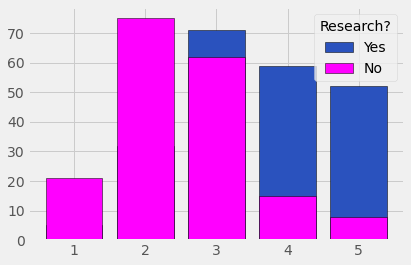

In [ ]:
counts = df.groupby(['University Rating', 'Research']).apply(len).reset_index()

df0 = counts[counts['Research'] == 0]
df1 = counts[counts['Research'] == 1]

plt.bar(df1['University Rating'], df1[0], edgecolor='black', label='Yes', color='#2a52be')
plt.bar(df0['University Rating'], df0[0], edgecolor='black', label='No', color='magenta')
plt.legend(title="Research?")
plt.show()

# Anonymous feedback

If you have any feedback for us, please let us know! The feedback form is completely anonymous, and we promise we'll take your suggestions into account for future presentations: https://forms.gle/C12vK71RJK6CraZv5

# References

Throughout the quarter, we will mainly be drawing our material from the following sources. Most of your learning will be done through trial and error, so we strongly encourage you to experiment by running code that you write from scratch!

For basic Python:
* The Python Tutorial: https://docs.python.org/3/tutorial/
* Basics of Python 3: https://www.learnpython.org/
* CodeAcademy Python 3 Course: https://www.codecademy.com/learn/learn-python-3

For the rest of the quarter:
* Introducing Data Science: http://bedford-computing.co.uk/learning/wp-content/uploads/2016/09/introducing-data-science-machine-learning-python.pdf 
* Python for Data Analysis: http://bedford-computing.co.uk/learning/wp-content/uploads/2015/10/Python-for-Data-Analysis.pdf 
* Pandas user guide: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html 
* Sklearn user guide: https://scikit-learn.org/stable/user_guide.html 